# <span style="background-color:#fff5b1"><span style="color:black"><B>보험사 마케팅 활용을 위한 고객 군집화 모델링(참조)

## **Mission 1. 탐색적 데이터 분석**

### **[미션 이해하기]**
* 여러분들은 파인애플 보험사의 직원입니다. 파인애플 보험사는 효과적인 마케팅 전략을 완성시키기 위해 데이터 기반 마케팅을 시작했습니다.
  <br>고객의 행동,성향, 니즈 등의 고객 데이터를 마케팅 전략에 반영하여 고객별로 적절한 마케팅 Action을 주는 미션을 받았습니다.
* 고객별로 특징을 적절하게 반영할 수 있는 마케팅 방안은 고객을 segment 하는 것 인데, 어떤 방법으로 고객을 묶을 수 있을까요?
  <br>바로, <font color="1E90FF"><b>군집분석을 기반으로 한 고객 segment를 개발 하는 것입니다.</font>


<b>[1일차] mission 1 목표 <b>: 고객의 기본 정보, 행동 정보 등을 확인해서 주요 변수를 선정하고 데이터 탐색해보기

#### <b>[실습프로세스]<b>

1. 데이터 불러오기
2. 데이터 기초 정보 확인
3. 주요 변수 선정 및 탐색
    * 분석가 선정 칼럼 탐색
    * 도메인 주요 항목 칼럼 탐색

---------------------------------------------------------------------------------------------
# **1. 데이터 불러오기**

* numpy, pandas, matplotlib, seaborn 등 데이터 분석에 필요한 라이브러리를 로딩해 봅시다.
* 만약 라이브러리가 없을 때 !pip를 통해 라이브러리를 설치해 주세요. (ex. !pip install pandas)
* 현위치에서 'customers_seg.csv' 파일을 읽어와 주세요.
* 활용하지 않는 변수를 index 화 해주세요.

In [1]:
# [같이 하기] 필요 라이브러리 로딩
# numpy, pandas, matplotlib, seaborn, os 를 임포트 하기

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [3]:
# 한글 세팅

plt.rc("font", family = "Malgun Gothic")
sns.set(font="Malgun Gothic",
rc={"axes.unicode_minus":False}, style='white')

In [5]:
# [같이 하기] 데이터 불러오기
# 1. data 변수에 'customers_seg.csv' 파일을 불러오기
# 2. data 변수 호출해서 상위 5개 확인해보기

data = pd.read_csv('customers_seg.csv')
data.head()

CID  AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준  \
0    1    3    피보험자   무직   1                 2.616381   0   기본  대학졸업   
1    2    1     계약자   고용   0                 6.352530   0   기본  고졸이하   
2    3    2     계약자   휴직   0                 4.974354   0   기본  대학졸업   
3    4    5     계약자   고용   1                13.480284   0   고급  고졸이하   
4    5    4     계약자   고용   0                 9.776436   0   기본    석사   

          소득  ... 결혼여부 월 납입액  VOC  타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널    총지불금액  \
0          0  ...   미혼    80    0           1    자주방문     없음  자사영업   631000   
1  102887400  ...   미혼    80    1         4이상     비방문    포인트   인터넷    54000   
2   22159500  ...   기혼    60    0         4이상     비방문     할인  자사영업   362000   
3   51562500  ...   기혼   110    0           2     비방문     할인  자사영업  1264000   
4   26820200  ...   기혼   120    0           3     비방문     없음   대리점   947000   

    자동차 거주지사이즈  
0  일반세단      소  
1  일반세단      중  
2  일반세단      중  
3  컴팩트카      대  
4   SUV      중  

[5 rows x 21 columns]

---------------------------------------------------------------------------------------------
# **2. 데이터 기초 정보 확인하기**
* 불러온 데이터셋(data)의 기초 정보들을 확인해봅시다.

In [8]:
# [문제1] 데이터 셋의 상위 5개 행을 확인해보자.

data.head()

CID  AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준  \
0    1    3    피보험자   무직   1                 2.616381   0   기본  대학졸업   
1    2    1     계약자   고용   0                 6.352530   0   기본  고졸이하   
2    3    2     계약자   휴직   0                 4.974354   0   기본  대학졸업   
3    4    5     계약자   고용   1                13.480284   0   고급  고졸이하   
4    5    4     계약자   고용   0                 9.776436   0   기본    석사   

          소득  ... 결혼여부 월 납입액  VOC  타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널    총지불금액  \
0          0  ...   미혼    80    0           1    자주방문     없음  자사영업   631000   
1  102887400  ...   미혼    80    1         4이상     비방문    포인트   인터넷    54000   
2   22159500  ...   기혼    60    0         4이상     비방문     할인  자사영업   362000   
3   51562500  ...   기혼   110    0           2     비방문     할인  자사영업  1264000   
4   26820200  ...   기혼   120    0           3     비방문     없음   대리점   947000   

    자동차 거주지사이즈  
0  일반세단      소  
1  일반세단      중  
2  일반세단      중  
3  컴팩트카      대  
4   SUV      중  

[5 rows x 21 columns]

In [10]:
# [문제2] 데이터 셋의 하위 5개 행을 확인해보자.

data.tail()

CID  AGE 등록(계/피) 고용상태  성별  Willingness to pay/Stay  갱신 상품타입  교육수준  \
11995  11996    1     계약자   고용   1                  25.9851   0   기본  대학졸업   
11996  11997    3    피보험자   고용   0                   3.4410   1   중급  대학졸업   
11997  11998    3    피보험자   무직   1                   9.0576   0   중급  대학졸업   
11998  11999    4     계약자   고용   1                   8.3472   0   중급  대학졸업   
11999  12000    3    피보험자   무직   1                   2.8971   0   중급  대학졸업   

             소득  ... 결혼여부 월 납입액  VOC  타 상품 보유 현황 온라인방문빈도 갱신인센티브  판매채널   총지불금액  \
11995  86451000  ...   기혼    70    0           2     비방문  설계사독려   인터넷  245000   
11996  25962000  ...   미혼    80    0           1    자주방문     할인  자사영업  468000   
11997         0  ...   미혼    90    3           2    자주방문     할인  자사영업  977000   
11998  26366000  ...   기혼   100    0           3     비방문    포인트  자사영업  854000   
11999         0  ...   미혼    80    0           1    자주방문     없음   콜센터  456000   

        자동차 거주지사이즈  
11995  일반세단      중  
11996  일반세단      중  
11997  일반세단      중  
11998  일반세단      대  
11999  컴팩트카      중  

[5 rows x 21 columns]

In [12]:
# [문제3] data 데이터프레임의 행, 열의 개수 확인해보자.(shape)

data.shape # 12000명 고객 , 21개의 컬럼 

(12000, 21)

In [14]:
#[문제4] data 데이터프레임의 컬럼명, 데이터 개수, 데이터 타입 정보를 확인 해보자.
print(data.columns)
print(data.shape[0])
print(data.dtypes)

Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')
12000
CID                          int64
AGE                          int64
등록(계/피)                     object
고용상태                        object
성별                           int64
Willingness to pay/Stay    float64
갱신                           int64
상품타입                        object
교육수준                        object
소득                           int64
지역                          object
결혼여부                        object
월 납입액                        int64
VOC                          int64
타 상품 보유 현황                  object
온라인방문빈도                     object
갱신인센티브                      object
판매채널                        object
총지불금액                        int64
자동차                         object
거주지사이즈                      object
dtype: object


In [16]:
# [문제5] 데이터 셋 수치형 데이터 기초통계 정보를 확인해보자

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

In [18]:
# [문제6] 데이터 셋의 모든 컬럼명(변수명)을 확인해보자.
data.columns


Index(['CID', 'AGE', '등록(계/피)', '고용상태', '성별', 'Willingness to pay/Stay', '갱신',
       '상품타입', '교육수준', '소득', '지역', '결혼여부', '월 납입액', 'VOC', '타 상품 보유 현황',
       '온라인방문빈도', '갱신인센티브', '판매채널', '총지불금액', '자동차', '거주지사이즈'],
      dtype='object')

---------------------------------------------------------------------------------------------
# **3. 주요 변수 선정 및 탐색**

<b> 21개의 features 값은 어떤 의미일지 알아보고 주요 변수를 선정해 봅시다!

---------------------------------------------------------------------------------------------
<b>이 중 주요 변수를 선정 해 보았을 때 <font color="1E90FF"><b>11개의 features를 선정하였다.</font>
<font color="1E90FF"><b>* 우리의 목표: 군집화가 된 고객 segment 개발</font>
   
<span><b>1. 도메인 내 주요 정보 항목</span>
    <br><br>
        - (1) Willingness to pay/Stay: 계속 보험을 유지할 지 판단하는 지표 (신용점수, 납부/연체기록, 소득 등 활용)
    <br>- (2) 소득
    <br>- (3) 월 납입액
    <br>- (4) 타상품 보유 현황: 고객이 이용하는 파인애플사의 타 서비스 수(어느정도 고객의 충성도를 알 수 있음)
    <br>- (5) 총지불금액
    
<span><b>2. 분석가 선정 컬럼</span>
    <br><br>- (6)AGE, (7)고용상태, (8)교육수준: 고객 기본 정보
    <br>- (9)상품타입, (10)거주지사이즈, (11)자동차: 소득 등과 연관해서 추정이 가능한 정보

## <b> (1) 분석가 선정 컬럼 탐색하기
* 분석가 선정 컬럼 : AGE, 고용상태, 교육수준, 상품 타입, 거주지사이즈, 자동차(총 6개 피쳐)
* 위 분석가 선정 컬럼을 crosstab을 통해서 탐색해 보자!

In [24]:
#[문제 7] 분석가 선정 컬럼들이 수치형인지 문자/범주형인지 알아보자! (info 활용)
anal_columns = ['AGE','고용상태','교육수준','상품타입','거주지사이즈','자동차']
data[anal_columns].info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   AGE     12000 non-null  int64 
 1   고용상태    12000 non-null  object
 2   교육수준    12000 non-null  object
 3   상품타입    12000 non-null  object
 4   거주지사이즈  12000 non-null  object
 5   자동차     12000 non-null  object
dtypes: int64(1), object(5)
memory usage: 562.6+ KB


**【각각의 변수들이 어떤 의미를 가지고 있을지 데이터 탐색을 해보자!】**

### 1) AGE

In [28]:
def my_count_plot(target):
    sns.countplot(x=target,data=data)
    plt.title(target)
    plt.grid()
    plt.show()
    print(data[target].value_counts(normalize = True).sort_index())

In [30]:
#[같이 하기] AGE 변수는 범주형이다. 이에 대해 범주별 비율을 탐색해보자.(.value_counts())
#  (1: 20대, 2: 30대, 3: 40대, 4: 50대, 5: 60대, 6: 70대)
# 결과를 인덱스 기준으로 정렬해서 조회 (.sort_index())

data['AGE'].value_counts(normalize = True).sort_index()

AGE
1    0.121167
2    0.128167
3    0.397917
4    0.260333
5    0.088083
6    0.004333
Name: proportion, dtype: float64

<b>**age 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [33]:
# 연령대를 보았을 때 약 40% 정도가 40대 임을 알 수 있다. 약 4~50대가 65% 정도이다.

# 윤성호님 의견
# 40대 다음으로 많은 비유을 차지하는 연령대는 50대임을 알 수있다.
# 아무래도 보험회사이다 보니 젊은 20대부터 보험가입을 시작해 지금까지 유지해온 4-50대 고객이 제일 많을것을 알 수 있다.

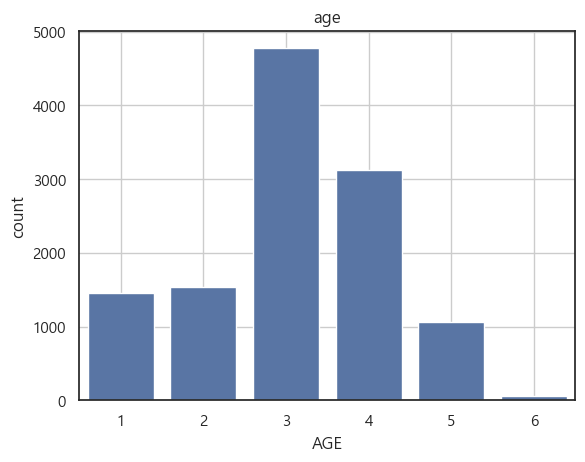

In [35]:
#[같이 하기] age에 대해 countplot 으로 시각화를 해보자!
# 1. sns.countplot(x=' ', data= )으로 시각화. 색상은 원하는 색상으로!
# 2. title=('age'), grid 도 넣어서 이쁘게 만들어보자.

sns.countplot(x='AGE',data=data)
plt.title('age')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### 2) 고용상태

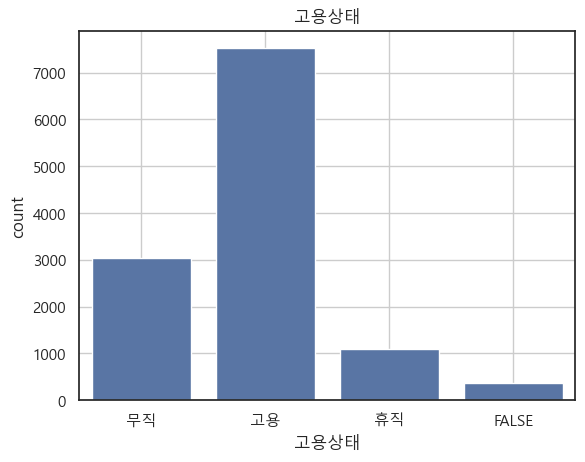

In [38]:
#[문제 8] '고용상태' 변수에 대해 범주별 빈도수를 탐색해보자.

target  = '고용상태'
sns.countplot(x=target,data=data)
plt.title(target)
plt.grid()
plt.show()

In [40]:
#[문제 9] 위 결과에 대해 비율로 계산해보자.
data[target].value_counts(normalize = True).sort_index()


고용상태
FALSE    0.030000
고용       0.626500
무직       0.252333
휴직       0.091167
Name: proportion, dtype: float64

In [42]:
#[문제 10] FALSE 값이 있잖어? 이게 뭐지?
# False를 무엇으로 해석해야 할까?

# (양정우의 의견)false는 계약직이 아닐까? 특히 계약 만료가 얼마 안남은 사람 
# (박소언님 의견) # 4대보험에 가입할 수 없는 일용직 등이라면? => 고용, 무직, 휴직도 아닌 애매한 상태라서 미응답하여 FALSE로 선택되었을 수도
#   고용이 전체의 62% 정도를 차지하였고 무직(25%), 휴직(9%)이 뒤를 이었음
#   고용상태에 따라 어떤 타입의 상품을 선택하고 있는지, 월 납입액은 얼마인지 등을 같이 확인하면 좋을 듯

# 김상아님 의견
# 고용중인 고객(62%)이 가장 많고 무직-휴직 순으로 비율이 작아진다.

# 이찬울님 의견
# 수집 거부, 오류등 수집 실패
# 보관기관이 오래되어 신뢰성, 법적 문제로 삭제?????????

# 윤성호님 의견
# False를 무엇으로 해석해야 할까?
# 비정규직? 장기간 휴가를 낸 사원? 협력업체?

# 진대규님 의견
# 비정규직, 협력업체(하청), 프리터, 알바, 일용직 등등등등

<b>**'고용상태' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**


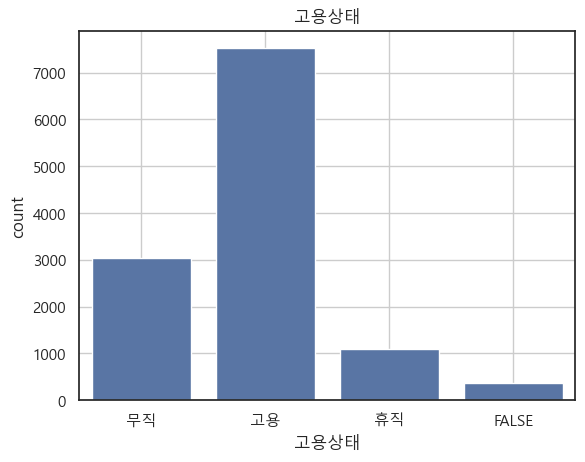

고용상태
FALSE    0.030000
고용       0.626500
무직       0.252333
휴직       0.091167
Name: proportion, dtype: float64


In [46]:
#[문제 11] '고용상태'에 대해 countplot 으로 시각화를 해보자!
target = '고용상태'
my_count_plot(target)

### 3) 교육수준

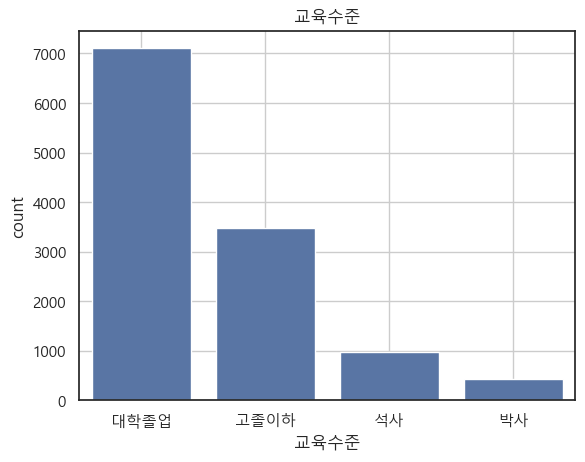

교육수준
고졸이하    0.289750
대학졸업    0.592083
박사      0.036583
석사      0.081583
Name: proportion, dtype: float64


In [49]:
#[문제 12] '교육수준' 변수에 대해 범주별 빈도수를 탐색해보자.

#[문제 13] 위 결과에 대해 비율로 계산해보자.

#[문제 14] '교육수준'에 대해 countplot 으로 시각화를 해보자!
target = '교육수준'
my_count_plot(target)

<b>**'교육수준' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [52]:
# 양정우 의견 대체로 대졸자 비율이 높음 , 석사와 박사 합쳐보면 10% 비율을 차지함 

# (박소언님 의견)
# 대학 졸업이 약 59%로 가장 높았고, 그 뒤로 고졸이하가 28%, 석사가 8%, 박사가 3%를 차지하고 있음
# 국내 학력수준 평균을 보았을 때 대졸이 가장 많고, 그다음이 고졸 - 석사 - 박사로 나올수도? => 당연한 결과

# 윤성호님 의견
# 회사 특성상 고객에게 보여지는 이미지가 중요하다보니 고졸이하보단 대학졸업과 그 이상의 학력이 많이 분포된것을 알 수 있다.
# 다른회사에 비해 석박사 비율은 낮은것 같다 추측해보자면 경영쪽 석박사 인력은 필요해보이지만 나머지 다른곳엔 수요가 없어 그런것 같다.

# 진대규님 의견

# 대졸자가 많은건 한국의 대학 진학 비율과 잘 맞는다 생각함.

### 4) 상품타입

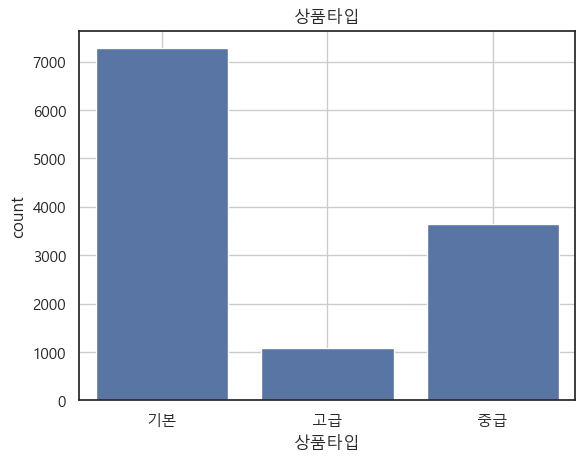

상품타입
고급    0.089583
기본    0.606500
중급    0.303917
Name: proportion, dtype: float64


In [55]:
#[문제 15] '상품타입'변수에 대해 범주별 비율을 탐색해보자.
#[문제 16] '상품타입'에 대해 countplot 으로 시각화를 해보자!
target = '상품타입'
my_count_plot(target)


<b>**'상품타입' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [58]:
# (양정우님 의견)
# 기본 , 중급 보험을 가입한 고객이 대부분 , 고급 상품타입을 선택한 비중이 적은것을 보아 충성고객일 거같음
# 마케팅 전략은 기본, 중급 고객들을 대상으로 연관 등급 상품을 더 가입하도록 독려 

# 박소언님 의견
# 기본이 60%, 중급이 30%, 고급이 약 8% 정도를 차지함
# 기본과 중급, 고급에 따른 혜택의 차이를 확인할 수 있으면 좋을 것 같음
# 기본에 몰려있는 이유가 가격적인 측면도 있을 수 있지만, 중급과 기본의 혜택 차이가 미미해서 기본을 가입해도 충분해서 기본에 몰려있을수도

# 김상아님 의견
# 기본 상품을 구매한 고객이 가장 많다. 각 상품별 혜택의 차이 궁금 (혜택의 차이가 별로 없나? 가격차이가 많이 나나? 아니면 기본만 해도 충분해서?)

# 윤성호님 의견
#보험료가 비싼 고급상품과 달리 비교적 가격이 싼 기본상품과 고급상품이 더 비율을 많이 차지하는것이 보여지고 있다.

# 진대규님 의견
# 납득가능한 비율이라 생각함.

### 5) 거주지사이즈

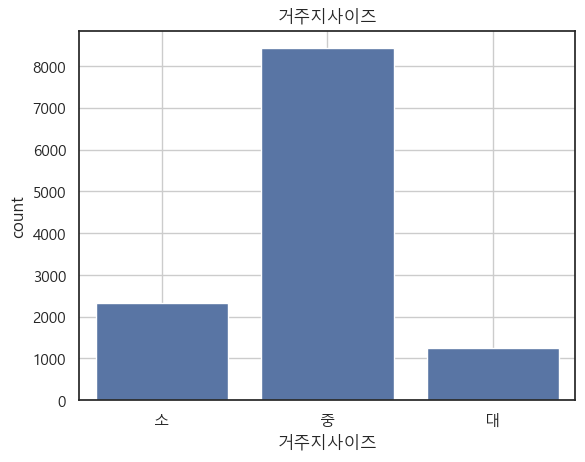

거주지사이즈
대    0.103750
소    0.194333
중    0.701917
Name: proportion, dtype: float64


In [61]:
#[문제 17]'거주지사이즈'변수에 대해 범주별 비율을 탐색해보자.
#[문제 18] '거주지사이즈'에 대해 countplot 으로 시각화를 해보자!
target = '거주지사이즈'
my_count_plot(target)


<b>**'거주지사이즈' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [64]:
# 양정우님 의견
# '중' 거주지 비중이 많음 , 
# 소 , 중 ,대  거주지사이즈를 구분한 기준이 뭔지 알 필요가 있음 ( N평 이하 , N 평 이상)

# 박소언님 의견
# 중이 70%로 가장 많았고, 소(약 20%). 대(10%) 순으로 나타남
# 거주 주택이 가격과 평형대를 종합적으로 고려했다고 하는데, 걸리는건 설계사가 입력했다는 점
# 설계사가 실수했음 우째...? 종합적 고려라는게 설계사 재량이 들어가는 부분이라면 설계사마다 다르게 평가할 수도 있지않나
# 거주지사이즈보다는 소득이 더 정확한 정보일 수 있음

# 이찬울님 의견
# 보험은 대부분의 사람들이 가입하기 떄문에, 중산층이 가장 높은 비율을 차지할 것으로 예상되어 거주지 사이즈 또한 중간크기가 많다

# 윤성호님 의견
#거주지 사이즈(지역 고려 제외)는 곧 그 고객의 재산과도 연결될 수 있다. 즉 이 보험회사 상품의 가격과 연관성이 많은것 같다. 


### 6) 자동차

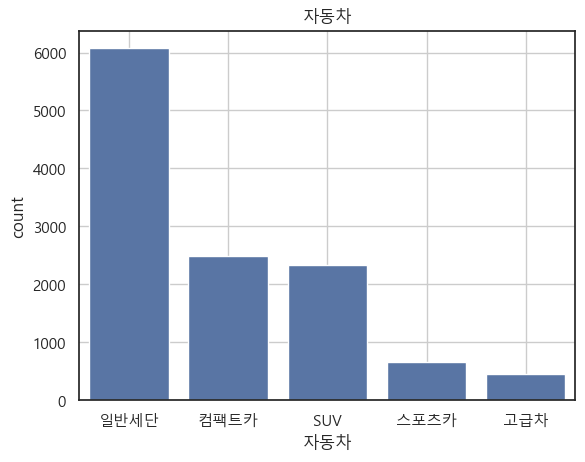

자동차
SUV     0.194667
고급차     0.037833
스포츠카    0.054333
일반세단    0.506167
컴팩트카    0.207000
Name: proportion, dtype: float64


In [67]:
#[문제 19]'자동차'변수에 대해 범주별 비율을 탐색해보자.
#[문제 20]'자동차'에 대해 countplot 으로 시각화를 해보자!
target = '자동차'
my_count_plot(target)


<b>**'자동차' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [70]:
# 일반 세단 , 컴팩트카 , SUV 자동차의 비중이 많음

# 고급차 , 스포츠카를 구매한 비율은  8% 

# (양정우의 의견) 고급차 스포츠카를 구매한 사람은 특별히 자동차 관련 보험을 가입했을 거 같음 
# (확인할 것)  스포츠카 + 고급차 를 구매한 고객이 (1) 챠량용 보험을 가입했는가? (2) 가입했다면 그 등급은 어떤가?
# (마케팅전략)  1. 가장 높은 차량 캐어 보험상품을 가입하도록 독려 

# 박소언님 의견
# 일반세단이 50%로 가장 높았고 컴팩트카(20%), SUV(19%), 스포츠카(5%), 고급차(3%) 순으로 나타남
# 자동차, 소득, 타 상품 보유 현황 등이 있으니 마케팅 방안 같은거 고민할 때 자동차 보험 같은거랑 같이 생각해봐도 될듯?

# 윤성호님 의견
# 고급차 비율은 일반 보험상품중 고급보험의 지분율에 비해 비교적 많이 낮다. 따라서 자동차보험을 판매할때 그 보험상품의 구성을 알차게 하는게 더욱더 도움될것 같다.
 
# 진대규님 의견
# 평범한 변수라 보임

## **(2) 도메인 주요 항목 컬럼 탐색하기**
* 도메인 주요 항목 : Willingness to pay/Stay,소득,월 납입액,타상품 보유 현황,총지불금액(총 5개 항목)
* 위 도메인 주요 항목 컬럼을 crosstab, histplot 을 통해서 탐색해 보자

In [73]:
#[문제 21] 도메인 내 주요 항목 컬럼들이 수치형인지 문자형인지 알아보자! (info 활용)
major_columns = ['Willingness to pay/Stay','소득','월 납입액','타 상품 보유 현황','총지불금액']
data[major_columns].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Willingness to pay/Stay  12000 non-null  float64
 1   소득                       12000 non-null  int64  
 2   월 납입액                    12000 non-null  int64  
 3   타 상품 보유 현황               12000 non-null  object 
 4   총지불금액                    12000 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 468.9+ KB


### 1) WTP(Willingness to pay/Stay)
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기


In [159]:
def my_hist_plot(target ,b= 30):
    plt.figure(figsize=(12,8))
    sns.histplot(data[target],bins=b,kde=True)
    plt.grid()
    plt.show()
    print(data[[target]].describe().T)

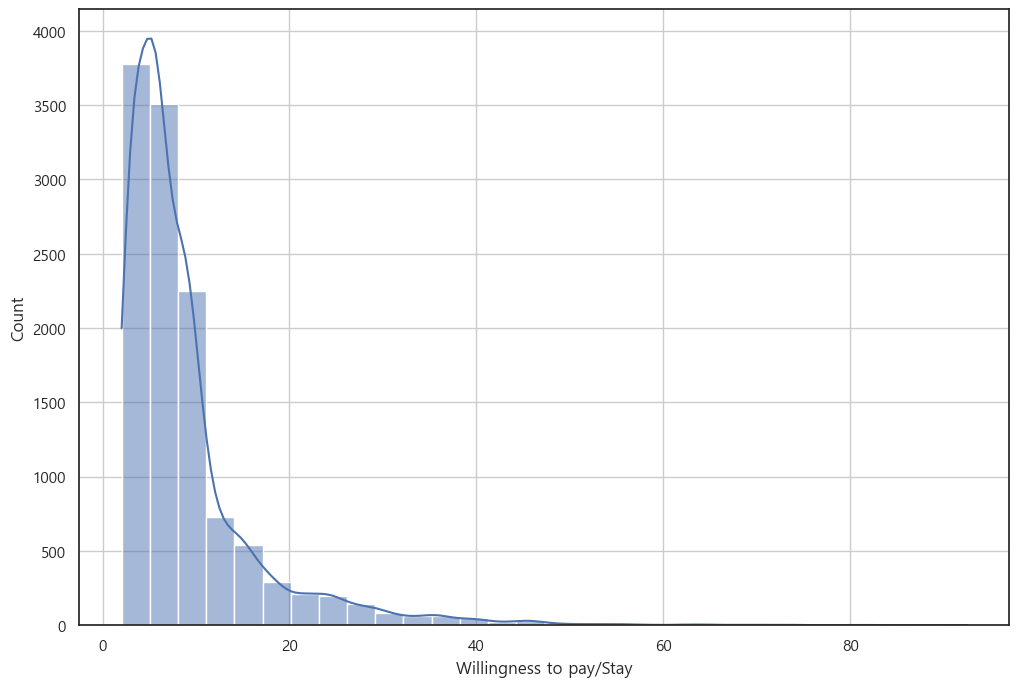

In [161]:
#[같이 하기] 히스토그램으로 'Willingness to pay/Stay(WTP)'에 대한 그래프를 그려보자.

# 1. figsize(12,8) 셋팅하기

plt.figure(figsize=(12,8))

# 2. histplot 그리기
# bins = 30, kde = True로 설정해서 그래프를 그려보자.

sns.histplot(data['Willingness to pay/Stay'],bins=30,kde=True)
plt.grid()
plt.show()

- bins는 막대개수 조정/ kde 는 커널밀도 추정(분포 곡선)

In [163]:
#[같이 하기] WTP의 평균값을 확인해보자(describe 사용)
feature = 'Willingness to pay/Stay'
data[[feature]].describe().T

count      mean       std      min     25%  \
Willingness to pay/Stay  12000.0  8.859478  7.698885  2.04573  4.3734   

                              50%     75%      max  
Willingness to pay/Stay  6.384831  9.8679  92.4963

<b>**'Willingness to pay/Stay(WTP)' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [167]:
# 양정우님 의견 
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.

# 박소언님 의견 
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.
# 보험료 대비 상품별 혜택이 부족하거나, 상품에 대한 다양한 선택지가 부족할 수 있음

# 이찬울님 의견
# 대부분의 고객의 경우 보험유지기대지표(WTP)의 값이 낮게 나옴(0~10정도 사이가 대부분)
# 평균값을 확인해보니 8 정도로 낮은 것으로 알 수 있음.
# 왜 낮을까?

# 윤성호님 의견
# 소득은 보험유지기대지표에서 가장 중요한 영향을 끼칠수 있다고 생각한다. 그래서 고객의 소득비율을 고려해 보험상품도 역시 맞춤형으로 조정해야 한다 생각한다.

# 진대규님 의견
# 왜 낮을까? -> 개인적인 생각으로는 주변 지인 보험설계사의 권유 이슈가 제일 클 것 같고, 좀 더 저렴한? 합리적인 보험으로 옮겨가는 부분도 클 것이다.

### 2) 소득
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

In [180]:
feature ='소득'
data[[feature]].describe().T

count         mean           std  min  25%         50%         75%  \
소득  12000.0  46417371.85  3.736221e+07  0.0  0.0  41862400.0  76641500.0   

            max  
소득  132020900.0

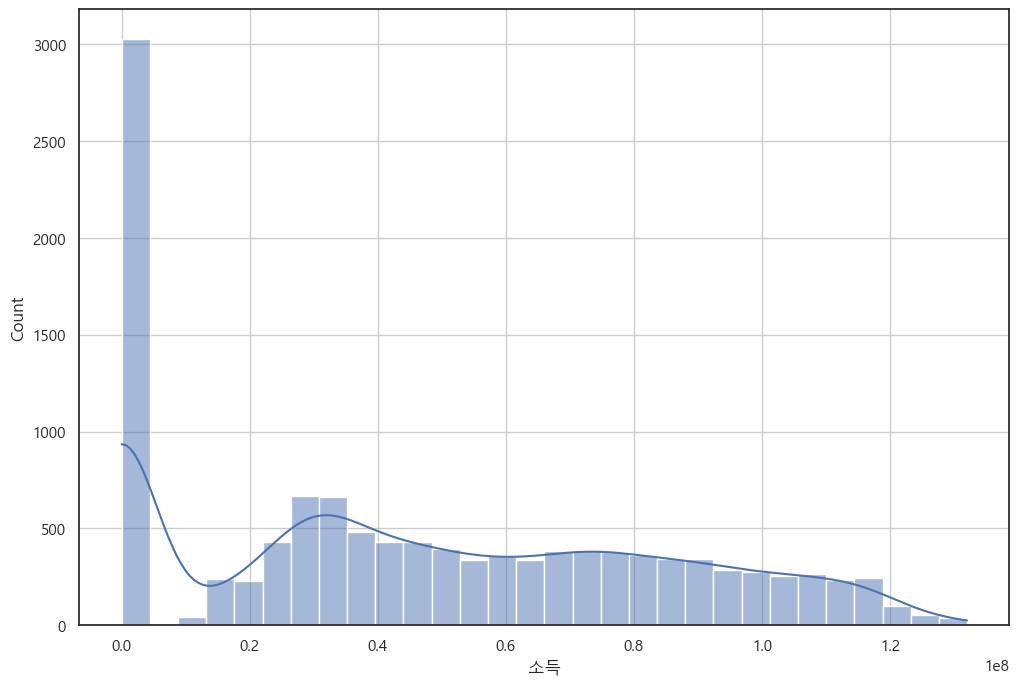

      count         mean           std  min  25%         50%         75%  \
소득  12000.0  46417371.85  3.736221e+07  0.0  0.0  41862400.0  76641500.0   

            max  
소득  132020900.0  


In [182]:
#[문제 22] 히스토그램으로 '소득'에 대한 그래프를 그려보자.
# bins = 30, kde = True로 설정해서 한번 보자
target = '소득'
my_hist_plot(target)


<b>**'소득' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# (추가분석) 김상아님
income = data.loc[data['소득']==0]
income['소득'].value_counts()

# 소득이 없는 고객이 약 25%로 가장 많다. 무직인 고객의 인원과 같다. 직장이 있는 고객들의 소득은 비교적 고르게 분포되어 있다.

In [ ]:
# 양정우님 의견
# 소득 격차가 분포는 소득이 0~7000만원 인 고객이 전체 75%를 차지하고 있음 , 
# 특히 소득이 0인 사람이 많은데  아마 가족 연동 보험 자녀들(피보험인) 이라 소득이 없는걸로 추정됨 

# 박소언님 의견 
# 소득이 적은 사람들이 많음 => 그래서 기본 상품을 가입한 사람들의 비율이 많았던건가
# 아니면 사회초년생들을 위한 보험을 주로 하고 있나? => 나이 분포를 봤을 때는 4050대가 많았는데

# 기존 저소득 가입자들을 그대로 유지하면서, 2030대 사회초년생과 소득이 높은 사람들을 끌어올 필요가 있는 듯
  # 보험은 한번 들어두면 오래 가니까 2030세대들이 가입해서 소득이 높아지는 시기에도 우리 보험을 쓸 수 있도록
  # 소득이 높은 사람들 역시 한번 가입할 때 비싼 상품을 가입해서 오래갈거니까 붙잡아야함
  
# 진대규님 의견
# 튀어나온 0 부분은 학생(부모님이 가입시켜줌) + 은퇴한 노인층 이라 추측함.

### 3) 월 납입액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

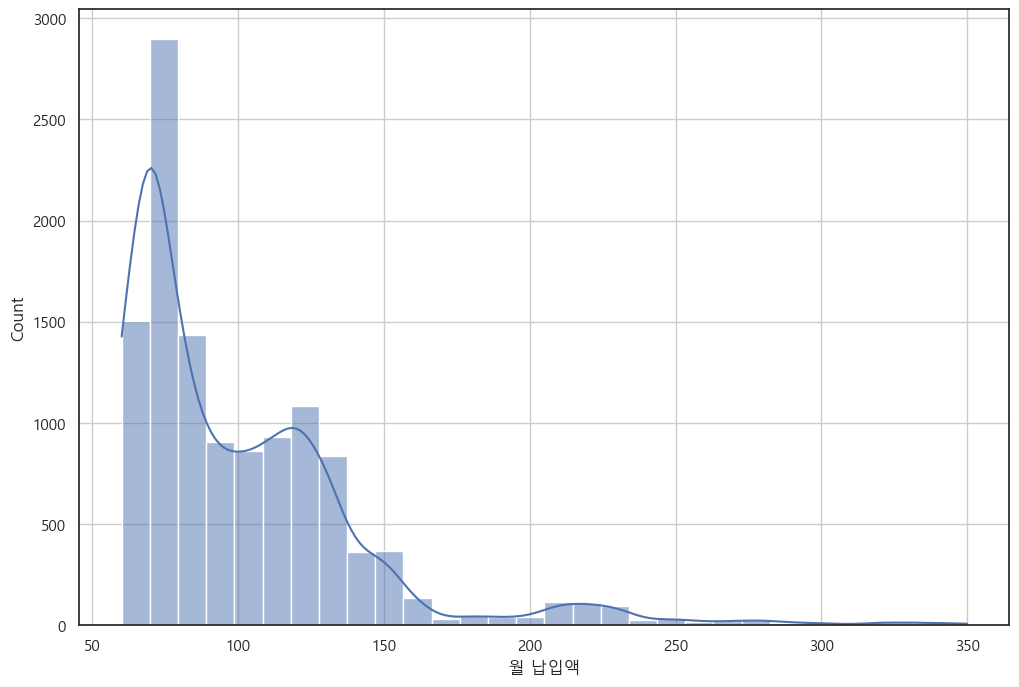

         count        mean       std   min   25%   50%    75%    max
월 납입액  12000.0  100.065833  42.45375  60.0  70.0  90.0  120.0  350.0


In [194]:
#[문제 23] 히스토그램으로 '월 납입액'에 대한 그래프를 그려보자.
#[문제 24] '월 납입액'의 평균값을 확인해보자(describe 사용)
# bins = 30, kde = True로 설정해서 한번 보자

target = '월 납입액'

my_hist_plot(target)


<b>**'월 납입액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 양정우님 의견
# 평균 월 납입액은 100만원 이하에 많이 분포해 있음 
# 350만원 << 고급 보험  + 스포츠카, 고급차 보유 인 고객일 것 같음 

# 박소언님 의견
# 월에 7~8만원 정도 납입하는 사람들이 가장 많음
# 그 다음으로는 6만원, 9만원 정도를 납부하는 사람들이 많을 듯
# 월 납입액과 상품 타입이 관련 있을 것 같기도?
  # 기본 상품 가격이 6 ~ 9만원 정도인 것 같음
  # 중급 상품이 10 ~ 13만원 정도인 듯?
  # 고급은 그 이상
  
# 윤성호님 의견
# 월 납입액 평균을 조사해보면 월 평균 100달러이다. 하지만 빈도수를 보면 100달러미만인 70-80달러 사이가 제일 많은것을 알 수 있다. 고객들의 소득을 고려하여 상품을
# 만드는것이 가장 나은것 같다.  가성비 보험 

# 진대규님 의견
# 상품 타입 비율에 영향을 받았기 때문에 월 납입액 50만원에 몰린 결과라 생각함.

### 4) 타상품 보유
* 문자형/범주형 컬럼이기 때문에 crosstab으로 데이터 확인해보기

In [232]:
target ='타 상품 보유 현황'
my_count_plot(target)

타 상품 보유 현황
1      0.356917
2      0.251417
3      0.128750
4이상    0.262917
Name: proportion, dtype: float64


In [220]:
#[문제 25] '타상품 보유' 변수에 대해 범주별 비율을 확인하자.
pd.crosstab(data['타 상품 보유 현황'], data['자동차'] , normalize='columns')
# 

자동차              SUV       고급차      스포츠카      일반세단      컴팩트카
타 상품 보유 현황                                                  
1           0.353168  0.405286  0.338957  0.356931  0.356280
2           0.263699  0.218062  0.265337  0.243662  0.261272
3           0.143408  0.083700  0.116564  0.134837  0.111514
4이상         0.239726  0.292952  0.279141  0.264570  0.270934

In [222]:
pd.crosstab(data['타 상품 보유 현황'], data['고용상태'] , normalize='columns')

고용상태           FALSE        고용        무직        휴직
타 상품 보유 현황                                        
1           0.391667  0.358872  0.347754  0.357404
2           0.297222  0.249800  0.250661  0.249543
3           0.116667  0.131551  0.120211  0.137112
4이상         0.194444  0.259777  0.281374  0.255941

In [224]:
pd.crosstab(data['타 상품 보유 현황'], data['교육수준'] , normalize='columns')

교육수준            고졸이하      대학졸업        박사        석사
타 상품 보유 현황                                        
1           0.340523  0.362139  0.378132  0.367722
2           0.254242  0.253483  0.200456  0.249234
3           0.138050  0.124279  0.102506  0.139939
4이상         0.267184  0.260099  0.318907  0.243105

In [226]:
pd.crosstab(data['타 상품 보유 현황'], data['거주지사이즈'] , normalize='columns')

거주지사이즈             대         소         중
타 상품 보유 현황                              
1           0.402410  0.339194  0.355099
2           0.235341  0.240995  0.256678
3           0.118072  0.145798  0.125608
4이상         0.244177  0.274014  0.262614

<b>**'타상품 보유' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 양정우님 의견 
# 타 상품 보유 비율은 1개 > 4개 = 2개 > 3개 순이다 
# 왜 3개를 보유한 고객이 수가 가장 적을까? > 보험 패키지의 구성때문인 것 같음 , 강하게 연관된 보험상품이 1개~ 2개 , 4개로 구성되어았음 

# 박소언님 의견 
# 1개가 35%로 가장 높았고, 4개(26%), 2개(25%), 3개(12%) 순으로 나타남
# 건강 보험 상품을 포함해, 모든 고객이 P사의 제품을 최소 2개는 이용하고 있다는 뜻
  # 고객들이 가입하고 싶어서 가입한게 아니라, 건강 보험 상품을 가입할 때 같이 가입이 되도록 강제되어 있는건 아닐지?
# 타 상품 보유변수와 WTP를 같이 확인해보는게 좋을 듯
  # 여러 상품을 동시에 가입하도록 만드는 것이 락인효과를 불러일으키는 효과를 만들고 있는지 확인해봐야함
  # 효과가 있다면 P사의 여러 상품을 함께 가입하도록 유도하는 방안이 필요할 것
  # 효과가 없다면 오히려 강제로 가입하게 하는 방안이 역효과를 불러일으켰거나, 타 서비스의 혜택도 부족하다는 것을 의미할 수 있음
  
# 이찬울님 의견
# 1개만 가입한 사람보다 여러개를 가지고 있는 사람의 비율이 더 많다 > 패키지 상품을 준비한다
# 1개만 가입한 사람의 비율이 가장 높다 > 올인원 상품을 준비해 다른 고객층도 흡수한다.

#>> 올인원 상품은 이탈율 증가로 야기될 수 있음.



### 5) 총지불금액
* 연속형/수치형 컬럼이기 때문에 histplot으로 데이터 확인해보기

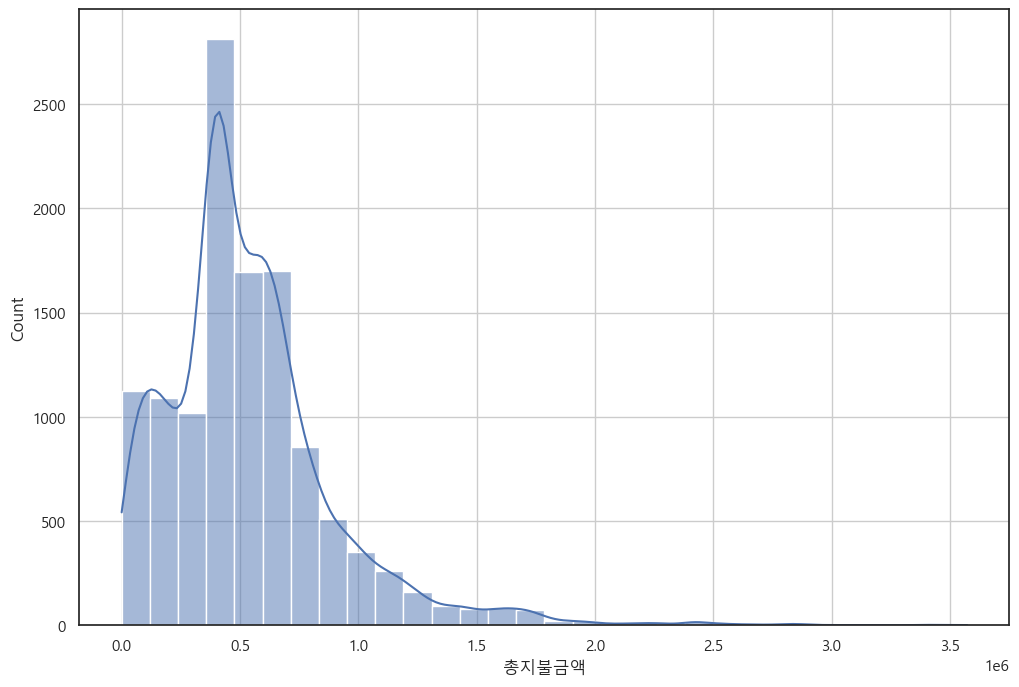

         count           mean            std  min       25%       50%  \
총지불금액  12000.0  535585.416667  358799.286205  0.0  336000.0  474000.0   

            75%        max  
총지불금액  679000.0  3573000.0  


In [228]:
#[문제 26] 히스토그램으로 '총지불금액'에 대한 그래프를 그려보자.
#[문제 27] '총지불금액'의 평균값을 확인해보자(describe 사용)
# bins = 30, kde = True로 설정해서 한번 보자
target = '총지불금액'
my_hist_plot(target)


In [ ]:
# 김상아님 분석 : 총 지불금액과 거주지 사이즈 범주별 분포
sns.histplot(data=data, x=data['총지불금액'], bins=30, kde=True, hue='거주지사이즈')
plt.title('거주지사이즈별 총지불금액')
plt.grid()
plt.show()

In [ ]:
# 김상아님 분석 : 총 지불금액과 고용상태 범주별 분포
sns.histplot(data=data, x=data['총지불금액'], bins=30, kde=True, hue='고용상태')
plt.title('고용상태별 총지불금액')
plt.grid()
plt.show()

<b>**'총 지불 금액' 변수에 대해 간단하게 탐색한 내용을 아래 주석으로 적어보자!**

In [ ]:
# 양정우님 의견
# 총 지불금액 평균은 50만원 , 최대 357만원 

# 박소언님 의견 
# 총 지불 금액 : 의료비 청구 이후 심사 후 지급 금액
# 50만원 선에 가장 많은 고객이 있음 => 기본 상품에서 보장받을 수 있는 최대 금액인건가

# 김상아님 의견
# 총지불금액 분포의 흐름은 거주지사이즈, 고용상태에서 다수가 차지하는 분포와 거의 동일하다.

# 윤성호님 의견

# 총 지불금액이 높다는 것은 그동안 고객이 보험을 해지하지 않고 꾸준히 가입을 해주어서 그런것이라고 볼 수 있다는건데 즉, 보험유지기대지표(WTP)가 높다는것으로 볼 수 있다.
# 그렇다면 고객이 보험상품을 해지하지 않고 꾸준히 유지할수 있도록 노력해야한다 ex> 상품 몇개월 이상 유지시 소정의 상품 제공, 보험료 할인등  특정 상품 가입시 부가서비스 무료 이용

# 진대규님 의견
# 자잘한 부상과 질병으로 인해 지급되는 의료비가 많다 보여짐.ㅉ

# **4. Mission 1-변수 탐색 결론**

* 수치형 컬럼 이외에도, 주요 변수 중 object 형태의 컬럼이 존재
* 수치형 컬럼은 단위가 각각 다르므로 스케일링 고려 필요
* 범주형 컬럼은 인코딩을 통해서 모델링을 위한 변환이 필요

<font color="1E90FF"><b>→ 데이터를 확인하고 탐색하여 전처리의 방향성 및 feature 값에 대한 이해 증대<b><br>
    

# <b>Mission 1 완료!
수고하셨습니다!

## (옵션) 다변량 분석 수행

In [242]:
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as spst
from statsmodels.graphics.mosaicplot import mosaic      #mosaic plot!

In [244]:
def categorical_numerical(df, feature, target) : # 범주형 , 숫자형 변수간 검정  (t-test, Anova) / 막대그래프 시각화 / 
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    
    sns.barplot(x = feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()

    '''
    an_list = []
    for i in range(df[feature].nunique()) :
        an_list.append(df.loc[df[feature] == i, target])# i가 0, 1, 2,...로 증가하는데, 이 인덱스가 feature의 실제 고유값과 일치하지 않을 수 있음
    '''
    #feature 컬럼의 실제 고유값을 사용하여 그룹을 생성
    unique_vals = df[feature].unique()
    an_list = [df.loc[df[feature] == val, target].dropna() for val in unique_vals]  # 결측치 처리 추가

    if len(an_list) == 2:
    # t-test
        t_stat, p_value = spst.ttest_ind(an_list[0], an_list[1])
        print(f"T-test 결과: t-statistic = {t_stat}, p-value = {p_value}")

    elif len(an_list) > 2:
    # ANOVA
        f_stat, p_value = spst.f_oneway(*an_list)
        print(f"ANOVA 결과: F-statistic = {f_stat}, p-value = {p_value}")

    else:
        print("비교할 그룹이 부족합니다.")
        
def categorical_categorical(df , feature , target): # 범주형 --> 범주형 간 검정 (카이제곱검정) / 모자이크플롯
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    mosaic(df, [ feature,target])
    #plt.axhline(1- df[target].mean(), color = 'r')
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()
    
    # 먼저 집계
    table = pd.crosstab(df[target], df[feature])
    print('교차표\n', table)
    print('=' * 100)

    # 카이제곱검정
    result = spst.chi2_contingency(table)
    print('카이제곱통계량', result[0])
    print('p-value', result[1])
    print('자유도', result[2])
    # print('기대빈도\n',result[3])
    
    
    
def numerical_numerical(df, feature , target): # 숫자형 , 숫자형 
    # 산점도 + 회귀분석 선 표기
    
    '''
    df = 데이터프레임
    feature = 구분 데이터프레임의 컬럼명
    target  = 목표 데이터프레임의 컬럼명
    '''
    sns.regplot(x=feature, y = target, data = df)
    plt.rcParams['font.family'] = 'Malgun Gothic'
    plt.grid()
    plt.tight_layout()
    plt.xticks(rotation=45)  # 45도 회전
    plt.show()
    print('='*100)
    result = spst.pearsonr(df[feature], df[target])
    print(f'상관계수 : {result[0]}, p-value : {result[1]}')


def numerical_numerical_hitmap(df):
    '''
    df = 데이터프레임
    '''
    # 숫자형으로 구성된 데이터들 한해서만 상관분석 수행 
    temp = df.select_dtypes(include=['number'])
    plt.figure(figsize = (8, 8))
    # 한글 폰트 설정: 맑은 고딕
    plt.rcParams['font.family'] = 'Malgun Gothic'
    # 유니코드 마이너스 사용 설정
    plt.rcParams['axes.unicode_minus'] = False
    sns.heatmap(temp.corr(),
            annot = True,            # 숫자(상관계수) 표기 여부
            fmt = '.2f',             # 숫자 포멧 : 소수점 3자리까지 표기
            cmap = 'RdYlBu_r',       # 칼라맵
            vmin = -1, vmax = 1)     # 값의 최소, 최대값
    plt.show()


- (연속형)
1. Willingness to Pay/Stay 보험 유지 기대확률(연속형)
2. 소득
3. 월 납입액
4. 총 지불 금액
   
                        
- (범주형)
1. age
2. 고용상태
3. 교육수준
4. 상품타입
5. 서주지사이즈
6. 자동차
7. 타 상품 보유 현황

In [259]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   CID                      12000 non-null  int64  
 1   AGE                      12000 non-null  int64  
 2   등록(계/피)                  12000 non-null  object 
 3   고용상태                     12000 non-null  object 
 4   성별                       12000 non-null  int64  
 5   Willingness to pay/Stay  12000 non-null  float64
 6   갱신                       12000 non-null  int64  
 7   상품타입                     12000 non-null  object 
 8   교육수준                     12000 non-null  object 
 9   소득                       12000 non-null  int64  
 10  지역                       12000 non-null  object 
 11  결혼여부                     12000 non-null  object 
 12  월 납입액                    12000 non-null  int64  
 13  VOC                      12000 non-null  int64  
 14  타 상품 보유 현황            

## 1. 모든 연속형 변수들 간 상관관계 확인

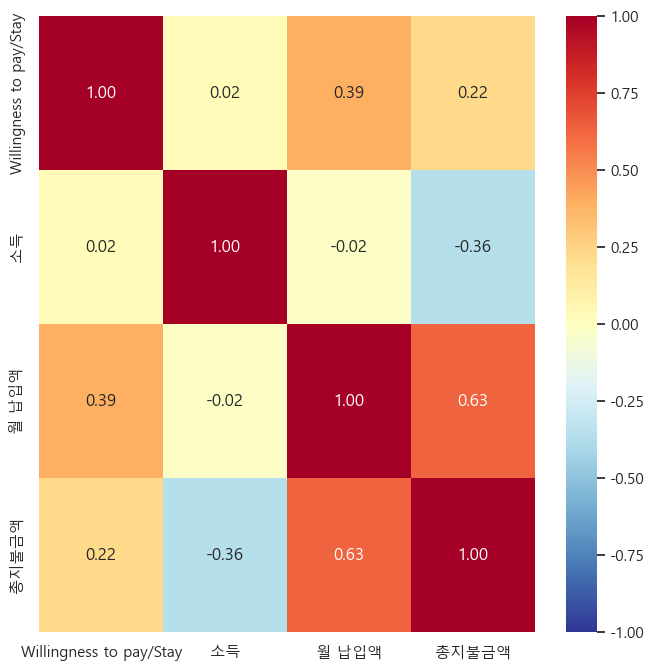

In [297]:
# 모든 연속형 변수들 간의 상관관계 확인 
numerical_numerical_hitmap(data[['Willingness to pay/Stay','소득','월 납입액','총지불금액' ]])


- 월 납입액 - 총지불금액은 높은 (0.5이상) 양의 상관관계가 있음  > 매달 보험료를 지불금액이 많을 수록 치료비 지급이 높음
- 
- Willingness to Pay/Stay 와 월 납입액 , 총 지불금액은 양의 상관관계가 존재 >>  매달 , 총 지불 보험계약금이 높을수록 보험을 유지할 가능성이 높음 , 치료비 지원비를 많이 받은 고객일수록 계약을 유지할 확률이높

- 소득 - 치료비 지급액은 음의 상관관계가 있음 >> 월급을 많이 받는 사람들은 보험 치료비를 많이 받지 않음 (월급이 많으니까 고액의 치료비를 지급하는 보험에 가입하지 않음 )

- 

## 2. 범주형(feature) - 연속형(target)간 관계확인

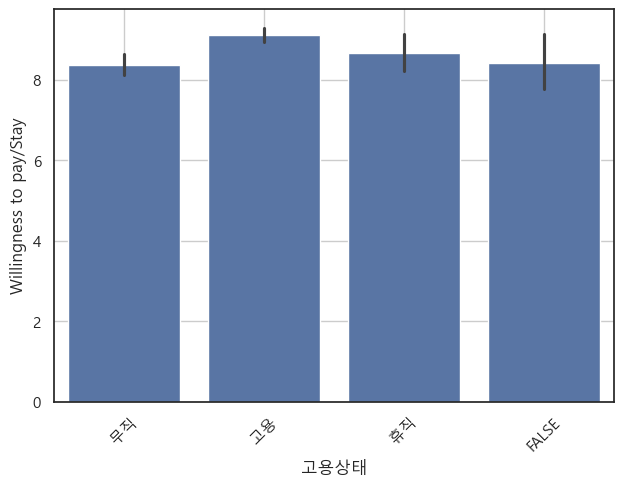

ANOVA 결과: F-statistic = 7.465334848393585, p-value = 5.447305274016952e-05


In [270]:
# 
target = 'Willingness to pay/Stay'
feature = '고용상태'
categorical_numerical(data, feature , target)

In [ ]:
# 고용 상태는 보험유지 기대 확률에 유의미한 영향을 주지 않음  (자유도 대비 F-score 3~5배 이상 )


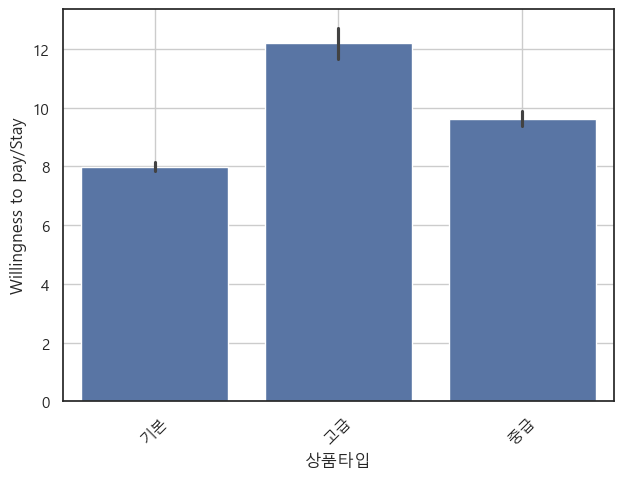

ANOVA 결과: F-statistic = 169.77790568339978, p-value = 1.952395854031448e-73


In [272]:
feature = '상품타입'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [ ]:
# 상품 타입 이 보험 유지에 큰 영향을 줌 (자유도 대비 F-score 3~5배 이상 )
# 고급 , 중급 , 기본 순으로 보험을 유지할 확률이 높음 
# (제안) 고급 보험상품을 가입한 고객은  잡아놓은 물고기라고 생각함 , 기본 등급 보험상품 고객의 이탈을 막던지, 중급 이상의 삼품을 구매하도록 전략을 세울수 있을듯 



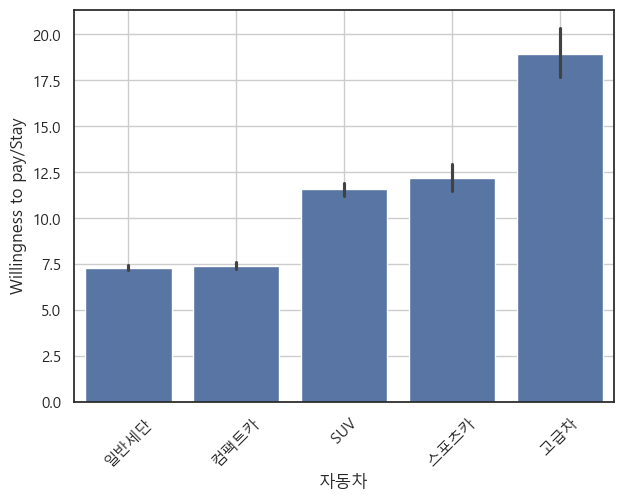

ANOVA 결과: F-statistic = 438.11027145476993, p-value = 0.0


In [274]:
feature = '자동차'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [ ]:
# 상품 타입 이 보험 유지에 큰 영향을 줌 (자유도 대비 F-score 3~5배 이상 )
# 고급 , 중급 , 기본 순으로 보험을 유지할 확률이 높음 
# (제안) 고급 보험상품을 가입한 고객은  잡아놓은 물고기라고 생각함 , 기본 등급 보험상품 고객의 이탈을 막던지, 중급 이상의 삼품을 구매하도록 전략을 세울수 있을듯 

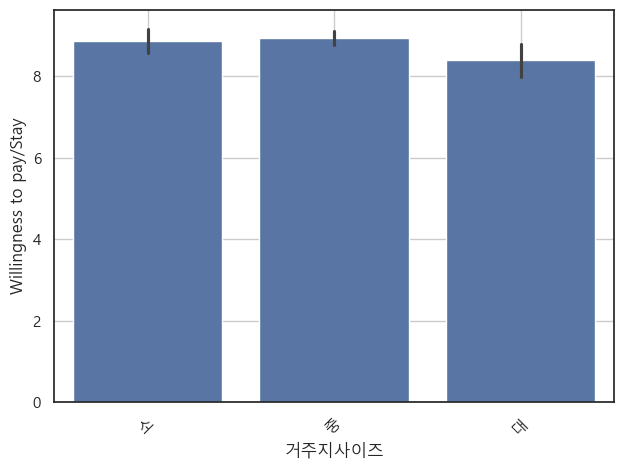

ANOVA 결과: F-statistic = 2.6390410469356613, p-value = 0.07147120098265375


In [285]:
# 거주지 사이즈   -  보험 유지 확률 
# 
feature = '거주지사이즈'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [ ]:
# 거주지 사이즈는 보험 유지 확률에 유의미한 영향을 주지 않음 (자유도 대비 F-score 3~5배 이하 )
# 거주지사이즈 - 보험유지확률 연관성 x 


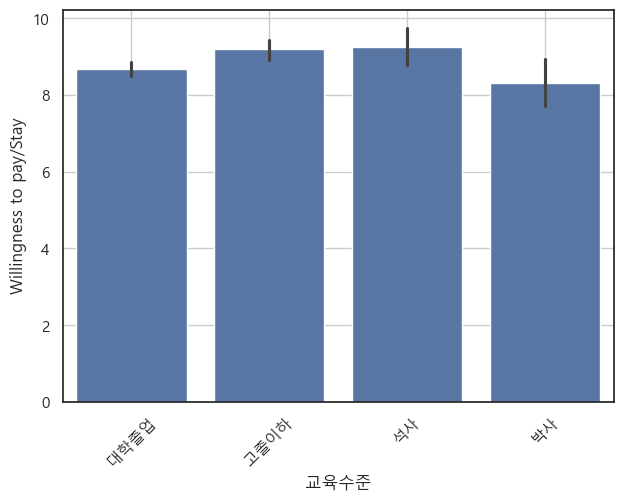

ANOVA 결과: F-statistic = 4.9658559134064415, p-value = 0.0019140545967984554


In [287]:
feature = '교육수준'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [ ]:
# 교육수준은 보험 유지 확률에 유의미한 영향을 주지 않음 (자유도 대비 F-score 3~5배 이하 )


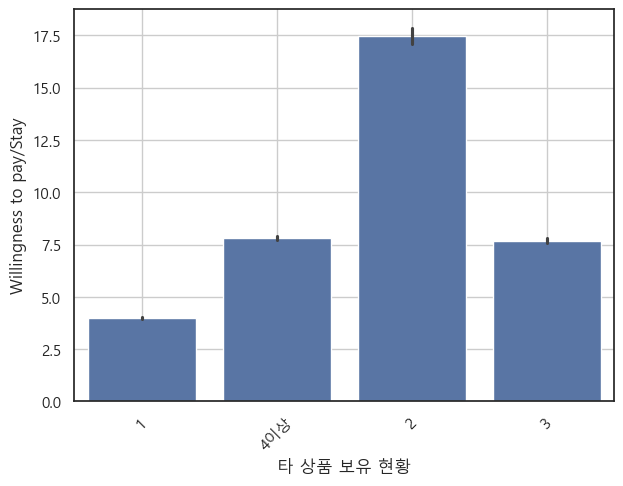

ANOVA 결과: F-statistic = 3501.2353609955726, p-value = 0.0


In [289]:
feature = '타 상품 보유 현황'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

In [ ]:
# 타 상품 2개 이상 보유한 고객일 수록 보험을 유지할 확률이 높음  (유의미함)
# (제안) 보험 2개 이상 가입한 고객이면 > 잡아놓은 물고기  
# 보험 1개만 가입한 고객 대상으로 홍보 , 마케팅을 하면 될것 > 2개 이상 보험상품 구매하도록 



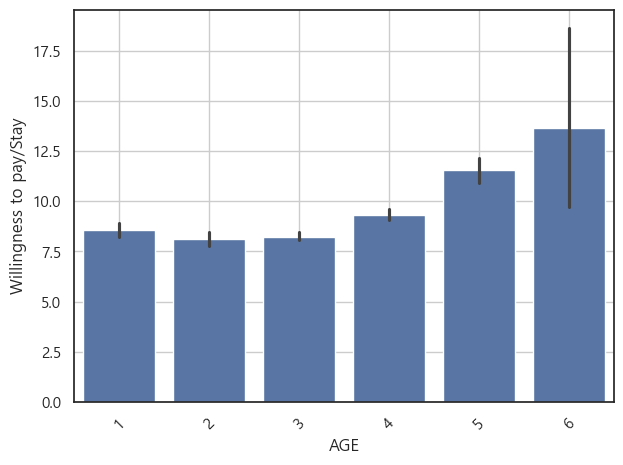

ANOVA 결과: F-statistic = 42.96606040537418, p-value = 4.793313715709697e-44


In [293]:
feature = 'AGE'
target = 'Willingness to pay/Stay'
categorical_numerical(data, feature , target)

## 3. 범주형() - 범주형() 관계확인 

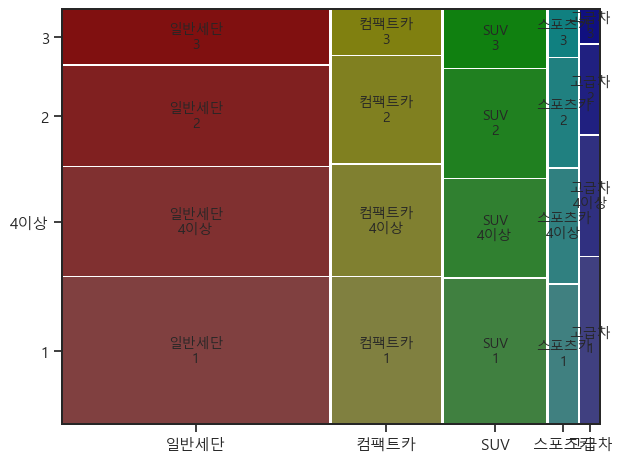

교차표
 자동차         SUV  고급차  스포츠카  일반세단  컴팩트카
타 상품 보유 현황                            
1           825  184   221  2168   885
2           616   99   173  1480   649
3           335   38    76   819   277
4이상         560  133   182  1607   673
카이제곱통계량 36.93127443707495
p-value 0.00022921090290393397
자유도 12


In [277]:
# 1. 자동차 고급 - 타 상품 보유 현황 , 상품 타입   3가지 변수간 연관성이 있을거 같음 (추측)

feature = '자동차'
target ='타 상품 보유 현황'
categorical_categorical(data,feature , target)



In [ ]:
# 자유도 대비 카이제곱 통계량이 5배 이상이 아님 (유의미하지 않음 )


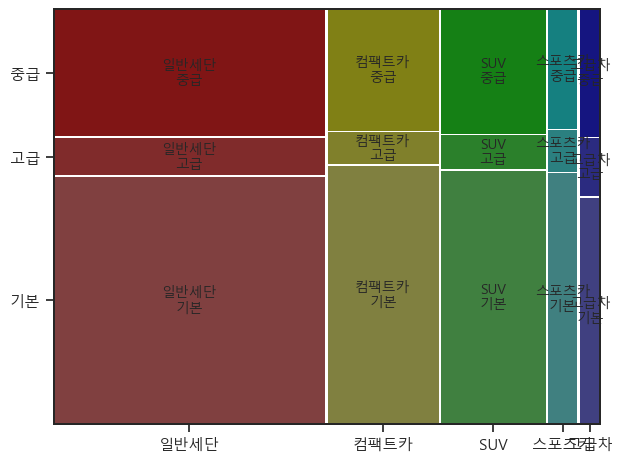

교차표
 자동차    SUV  고급차  스포츠카  일반세단  컴팩트카
상품타입                             
고급     194   64    65   556   196
기본    1436  249   397  3641  1555
중급     706  141   190  1877   733
카이제곱통계량 25.087930713859382
p-value 0.0015021048559134484
자유도 8


In [279]:
feature = '자동차'
target ='상품타입'
categorical_categorical(data,feature , target)

### 1) 갱신여부
- 비갱신(0) : 보험 가입기간동안 보험료가 동일하게 유지됨
- 갱신(1) : 보험 가입기간동안 보험료가 주기적으로 재산정됨

In [ ]:
# 범주별 비율 확인
data['갱신'].value_counts(normalize = True).sort_index()

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='갱신', data=data, palette='Blues')
plt.title('갱신여부 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 박소언님 의견 
# 보험 가입기간 동안 보험료가 일정하게 유지되는 비갱신 보험에 가입한 사람들이 많음(약 85%)

### 2) 지역
- 도시근교, 도심, 시골

In [ ]:
# 범주별 비율 확인
data['지역'].value_counts(normalize = True).sort_index()

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='지역', data=data, palette='Blues')
plt.title('지역 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 박소언님 의견
# 도시 근교에 거주하는 사람들이 약 63%로 가장 많았고, 시골이 19%, 도심이 17% 순으로 나타남
# 도심에 사는 사람들이 집이나 자동차, 소득, 월납입액 등이 높을수도?

### 3) 결혼 여부
- 미혼, 기혼

In [ ]:
# 범주별 비율 확인
data['결혼여부'].value_counts(normalize = True).sort_index()

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='결혼여부', data=data, palette='Blues')
plt.title('결혼여부 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 박소언님 의견
# 기혼이 57%로 높게 나타났으나, 미혼도 42% 정도로 나타남 => 드라마틱한 차이는 없는 것 같음

### 4) VOC(불만접수 사례 수)

In [ ]:
# 빈도수 확인
data['VOC'].value_counts(normalize = True).sort_index()

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='VOC', data=data, palette='Blues')
plt.title('불만접수 사례 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 박소언님 의견
# 0건이 79%로 가장 높았고, 1건(10%)이 그 다음으로 높았음
# 불만접수 사례랑 WTP를 같이 봐야할 듯
# 불만접수 사례는 적은데 WTP는 낮음 => 불만접수 안하고 그냥 이거 안쓰고 말지 하는 사람들이 많은 듯
  # 이렇게 되면 어디가 어떻게 부족하고 불만족스러운지 알기 어려움

### 5) 갱신인센티브
- 보험사가 갱신을 목적으로 한 마케팅 활동
- 없음, 설계사독려, 포인트, 할인

In [ ]:
# 범주별 비율 확인
data['갱신인센티브'].value_counts(normalize = True).sort_index()

In [1]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='갱신인센티브', data=data, palette='Blues')
plt.title('갱신인센티브 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 박소언님 의견
# 할인이 40%로 가장 높았고, 설계사의 독려가 32%, 포인트가 15%, 없음이 11%로 나타남

# 역시 할인이 최고인 듯? => 그렇다고 무작정 가격 프로모션을 하면 남는게 없어짐 => 적정 수준을 찾아야함
# 생각보다 설계사의 독려가 갱신에 큰 영향을 미침 => 독려는 계속 활용하면 좋을 듯
# 포인트는 생각보다 낮게 나왔는데, 여기에는 (1) 포인트 지급 방식의 문제, (2) 포인트 지급 금액의 문제가 있을 수 있을 듯
  # (1) 사용처가 한정적인 포인트를 지급할 경우, 안주느니만 못한 포인트일 수 있음
  # (2) 포인트를 지급하긴 하지만 그 금액이 할인보다 적을 경우에는 할인을 선택하는 사람들이 많을 것임

NameError: name 'plt' is not defined

### 6) 판매채널
- 해당 상품 구매 채널
- 대리점, 인터넷, 자사영업, 콜센터

In [ ]:
# 범주별 비율 확인
data['판매채널'].value_counts(normalize = True).sort_index()

In [ ]:
# 시각화
plt.figure(figsize=(8, 5))
sns.countplot(x='판매채널', data=data, palette='Blues')
plt.title('판매채널 분포', fontsize=15)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# 박소언님 의견

# 대리점이 약 38%로 가장 높았고, 자사영업이 27%, 콜센터가 19%, 인터넷이 14%로 나타남
# 주요 가입 연령대가 4050세대인 만큼 인터넷보다는 대면(대리점, 자사영업) 방식의 가입이 많은 것으로 보임
# 4050대를 넘어 2030세대의 가입을 유도하기 위해서는 비대면(인터넷, 콜센터) 방식을 강화해야함
  # 특히 인터넷 강화가 필요 => 전화는 콜포비아 때문에 안좋아하는 사람도 많고, 인터넷이 더 쉽고 빠르니까 선호하는 사람들이 많음
  # 2030세대가 나이들어서 4050세대가 될거니까, 이들이 선호하는 방식으로 판매채널을 확대하는 것이 필요함

## 4.결론 


1. 40대 이하 고객 이탈확률 > 50대 이상 고객 이탈 확률
2. 1개 타 상품 보유 고객 이탈 확률 > 2개 이상 타 상품 고객 이탈확률
3. 일반 세단 , 컴팩트카 보유고객의 이탈확률 > 스포츠카 , 고급차 , SUV 보유 고객의 이탈 확률
4. 기본 , 중급 등급의 보험상품 고객의 이탈 확률 > 고급 보험상품 고객 이탈 확률
5. 매달 , 총 지불 보험계약금이 높을수록 보험을 유지할 가능성이 높음 , 치료비 지원비를 많이 받은 고객일수록 계약을 유지할 확률이높